# **Desafio Titanic do Kaggle**  🛳 🚢⚓

**Objetivo**: Usar aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

**Dicionário de dados:**  
- **Survived:** Passageiro sobreviveu:	0 = Não, 1 = Sim
- **Pclass:**	Classe:	1 = 1º, 2 = 2º, 3 = 3º  
- **Sex:** Sexo: Masculino ou Feminino
- **Age:** Idade
- **Sibsp:** Siblings (Irmãos) / Spouses (Esposo(a)) abordo
- **Parch:** Parents (Pais) / Children (Filhos) abordo
- **Ticket:**	Número do ticket
- **Fare:**	Tarifa paga pelo passageiro
- **Cabin:**	Número da cabine
- **Embarked:**	Portão de Embarque:	C = Cherbourg, Q = Queenstown, S = Southampton

_____
Import das bibliotecas e leitura dos dados

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
train = pd.read_csv('/content/drive/MyDrive/Projetos_teste/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projetos_teste/titanic/test.csv')

Análise exploratória dos dados

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
train.shape

(891, 12)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
test.shape

(418, 11)

In [72]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [74]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
# Unindo os datasets train e teste para tratar todos os valores de uma vez

titanic_df = pd.concat([train, test], ignore_index=True)

In [76]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


____
Preparação do DataFrame (feature engineering)

In [77]:
# titanic_df['Survived'].value_counts()

In [78]:
# Criando o DataFrame novo que será usado nos testes

df = pd.DataFrame()

In [79]:
df['Survived'] = titanic_df['Survived']

<Axes: xlabel='Survived', ylabel='count'>

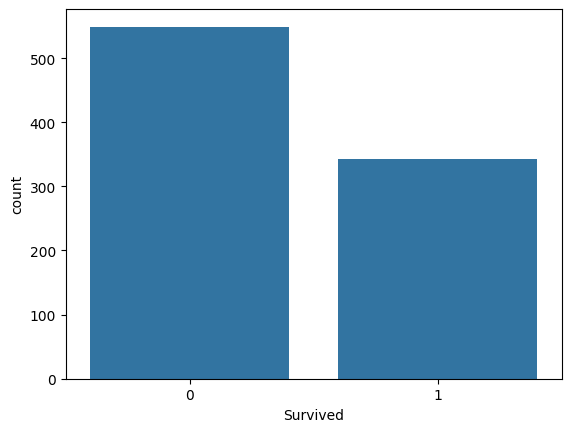

In [80]:
# Comparando a quantidade de mortos e sobreviventes

sns.countplot(data = train, x = 'Survived')

In [81]:
# Criação de uma função que cria gráficos countplot para dados numéricos e distplot para dados categóricos

def plot_func(data, column, count = True):
  print(f'Quantidade de valores únicos: {data[column].nunique()}')
  print(f'Valores únicos: {data[column].unique()}')
  print(f'Quantidade de valores nulos: {data[column].isnull().sum()}')
  print(f'Quantidade por opção: \n{data[column].value_counts()}')
  if count == True:
    sns.countplot(data = data, x = column, hue = 'Survived')
  else:
    sns.distplot(data[column], kde = True)

Quantidade de valores únicos: 3
Valores únicos: [3 1 2]
Quantidade de valores nulos: 0
Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


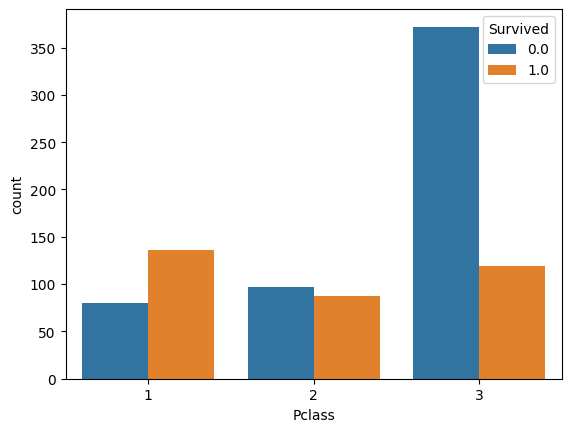

In [82]:
# Chamando a função para comprar a quantidade de sobreviventes com a classe

plot_func(titanic_df, 'Pclass')

In [83]:
# Transformando a coluna de sexo em numérica

titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])

Quantidade de valores únicos: 2
Valores únicos: [0 1]
Quantidade de valores nulos: 0
Quantidade por opção: 
Sex
0    843
1    466
Name: count, dtype: int64


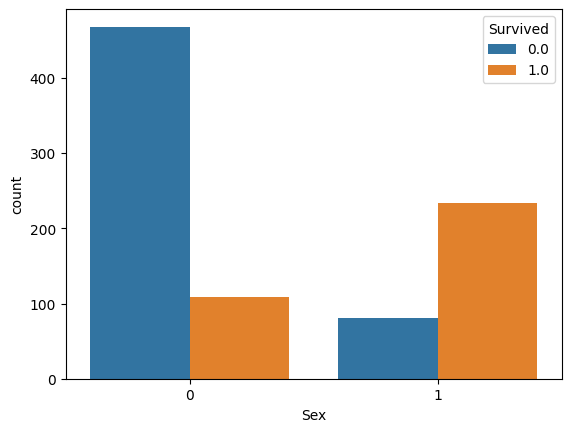

In [84]:
# Comparando a coluna Survived com o sexo

plot_func(titanic_df, 'Sex')

In [85]:
# Adicionando a coluna sexo no datast de teste

df['Sex'] = titanic_df['Sex']

Quantidade de valores únicos: 98
Valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Quantidade de valores nulos: 263
Quantidade por opção: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


<ipython-input-81-9f7c354bf36d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde = True)


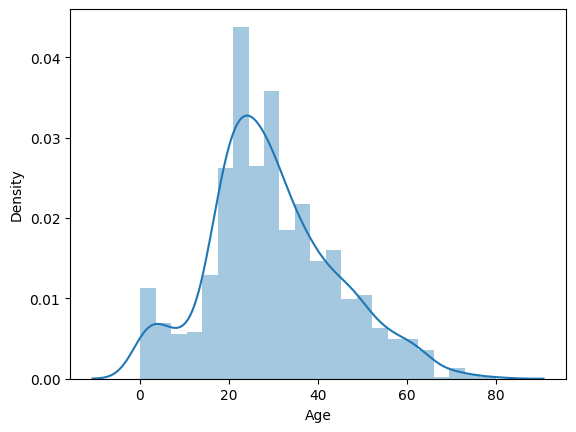

In [86]:
# Verificando a faixa etária dos passageiros

plot_func(titanic_df, 'Age', False)

In [87]:
# Verificando os valores nulos no campo de idade

titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [88]:
# Tirando a média de idade geral de todos os passageiros

titanic_df['Age'].mean()

29.881137667304014

In [89]:
# Entendo a correlação do campo idade com as outras colunas

titanic_df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [90]:
# Verificando a média de idade por classe

for i in sorted(titanic_df['Pclass'].unique()):
  print(f'A média de idade da classe {i} é de {titanic_df[titanic_df["Pclass"] == i]["Age"].mean()}')

A média de idade da classe 1 é de 39.15992957746479
A média de idade da classe 2 é de 29.506704980842912
A média de idade da classe 3 é de 24.81636726546906


In [91]:
# Loop for para inputar a média de idade nos campos nulos de acordo com a classe do passageiro

for i in titanic_df.index:
  if pd.isnull(titanic_df['Age'][i]):
    if titanic_df['Pclass'][i] == 1:
      titanic_df['Age'][i] = round(titanic_df[titanic_df["Pclass"] == 1]["Age"].mean())
    elif titanic_df['Pclass'][i] == 2:
      titanic_df['Age'][i] = round(titanic_df[titanic_df["Pclass"] == 2]["Age"].mean())
    elif titanic_df['Pclass'][i] == 3:
      titanic_df['Age'][i] = round(titanic_df[titanic_df["Pclass"] == 3]["Age"].mean())
  else:
    continue

<ipython-input-91-2a1a3a6dce87>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(titanic_df[titanic_df["Pclass"] == 3]["Age"].mean())
<ipython-input-91-2a1a3a6dce87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(titanic_df[titanic_df["Pclass"] == 2]["Age"].mean())
<ipython-input-91-2a1a3a6dce87>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(t

In [92]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [93]:
# Adicionando a coluna de idade no dataset de teste

df['Age'] = titanic_df['Age']

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [95]:
# Adicionando a coluna de classe no dataset de teste

df['Pclass'] = titanic_df['Pclass']

Quantidade de valores únicos: 281
Valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.   

<ipython-input-81-9f7c354bf36d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde = True)


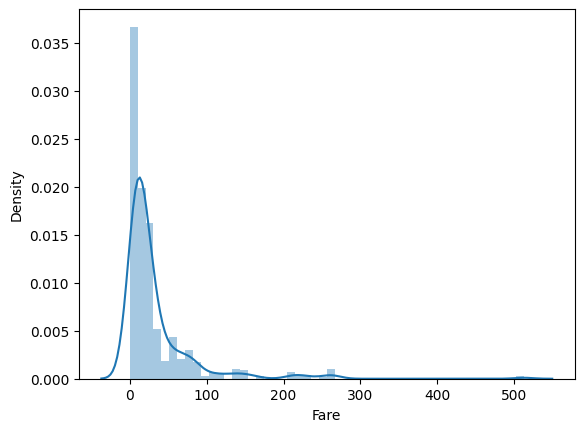

In [96]:
# Verificando a tarifa dos passageiros

plot_func(titanic_df, 'Fare', False)

In [97]:
df.head()

,Survived,Sex,Age,Pclass
0,0.0,0,22.0,3
1,1.0,1,38.0,1
2,1.0,1,26.0,3
3,1.0,1,35.0,1
4,0.0,0,35.0,3


In [98]:
# O valor nulo da tarifa é da terceira classe

titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [99]:
# Verificando qual a média de tarifa da terceira classe

titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

13.302888700564973

In [100]:
# Inputando o valor da média da tarifa da classe 3 no valor nulo

titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [101]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Quantidade de valores únicos: 3
Valores únicos: ['S' 'C' 'Q' nan]
Quantidade de valores nulos: 2
Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


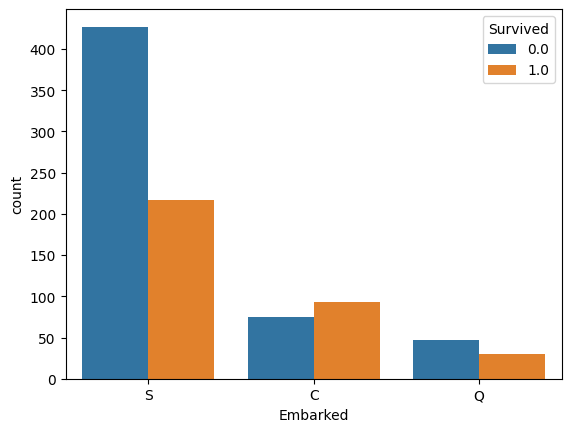

In [102]:
# Comparando o portão de embarque com a coluna Survived

plot_func(titanic_df, 'Embarked')

In [103]:
# Preenchendo o campo de embarque nulo com o valor C

titanic_df['Embarked'].fillna('C', inplace = True)

In [104]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [105]:
# Adicionando as colunas de Embarque e tarifa ao dataset de teste

df['Embarked'] = titanic_df['Embarked']
df['Fare'] = titanic_df['Fare']

In [106]:
df.head()

,Survived,Sex,Age,Pclass,Embarked,Fare
0,0.0,0,22.0,3,S,7.2500
1,1.0,1,38.0,1,C,71.2833
2,1.0,1,26.0,3,S,7.9250
3,1.0,1,35.0,1,S,53.1000
4,0.0,0,35.0,3,S,8.0500


In [107]:
# Transformando a coluna de classe em uma coluna numérica

pclass = pd.get_dummies(df['Pclass'], prefix = 'Pclass')
pclass

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
1304,False,False,True
1305,True,False,False
1306,False,False,True
1307,False,False,True


In [108]:
# Unindo o dataset de teste com a coluna de classe transformada

titanic_completo = pd.concat([df, pclass], axis = 1)
titanic_completo

,Survived,Sex,Age,Pclass,Embarked,Fare,Pclass_1,Pclass_2,Pclass_3
0,0.0,0,22.0,3,S,7.2500,False,False,True
1,1.0,1,38.0,1,C,71.2833,True,False,False
2,1.0,1,26.0,3,S,7.9250,False,False,True
3,1.0,1,35.0,1,S,53.1000,True,False,False
4,0.0,0,35.0,3,S,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,3,S,8.0500,False,False,True
1305,NaN,1,39.0,1,C,108.9000,True,False,False
1306,NaN,0,38.5,3,S,7.2500,False,False,True
1307,NaN,0,25.0,3,S,8.0500,False,False,True


In [109]:
# Dropando a antiga coluna de classe

titanic_completo.drop('Pclass', axis = 1)

,Survived,Sex,Age,Embarked,Fare,Pclass_1,Pclass_2,Pclass_3
0,0.0,0,22.0,S,7.2500,False,False,True
1,1.0,1,38.0,C,71.2833,True,False,False
2,1.0,1,26.0,S,7.9250,False,False,True
3,1.0,1,35.0,S,53.1000,True,False,False
4,0.0,0,35.0,S,8.0500,False,False,True
...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,S,8.0500,False,False,True
1305,NaN,1,39.0,C,108.9000,True,False,False
1306,NaN,0,38.5,S,7.2500,False,False,True
1307,NaN,0,25.0,S,8.0500,False,False,True


In [110]:
lb = LabelEncoder()

In [111]:
# Usando o LabelEncoder para transformar a coluna de portões de embarque em numérica

titanic_completo['Embarked'] = lb.fit_transform(titanic_completo['Embarked'])

In [112]:
titanic_completo['Embarked'].value_counts()

Embarked
2    914
0    272
1    123
Name: count, dtype: int64

In [113]:
# Dividindo novamente o dataset entre treino e teste

train_new = titanic_completo.head(891)
test_new = titanic_completo.tail(418)

In [114]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Embarked  891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Pclass_1  891 non-null    bool   
 7   Pclass_2  891 non-null    bool   
 8   Pclass_3  891 non-null    bool   
dtypes: bool(3), float64(3), int64(3)
memory usage: 44.5 KB


In [115]:
# Mudando o tipo das colunas de float para inteiro

train_new['Survived'] = train_new['Survived'].astype(int)
train_new['Age'] = train_new['Age'].astype(int)

<ipython-input-115-7f0bf2244dee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['Survived'] = train_new['Survived'].astype(int)
<ipython-input-115-7f0bf2244dee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['Age'] = train_new['Age'].astype(int)


In [116]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   Pclass    891 non-null    int64  
 4   Embarked  891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Pclass_1  891 non-null    bool   
 7   Pclass_2  891 non-null    bool   
 8   Pclass_3  891 non-null    bool   
dtypes: bool(3), float64(1), int64(5)
memory usage: 44.5 KB


___
###RandomForest 🌳🌳
Separando os dados de **treino**, **teste** e **validação** para o modelo

In [118]:
X = train_new.drop('Survived', axis = 1)
y = train_new['Survived']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [120]:
X_train, X_validacao, y_train, y_validacao = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42 )

In [121]:
rf = RandomForestClassifier()

In [122]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = rf.predict(X_test)
y_pred_vc = rf.predict(X_validacao)

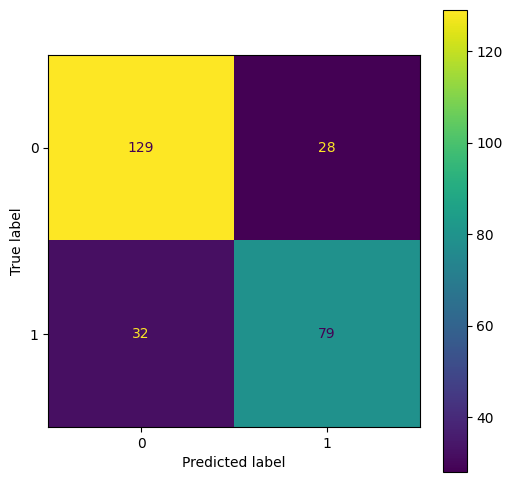

In [124]:
# Matrix de confusão do modelo

cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
cmp.plot(ax=ax)

In [125]:
# Métricas

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.71      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [130]:
print(classification_report(y_validacao, y_pred_vc))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.80      0.87      0.83        23

    accuracy                           0.87        63
   macro avg       0.86      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



___
###Logistic Regression
Testando o modelo de regressão logística

In [131]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_pred_lr = lr.predict(X_test)

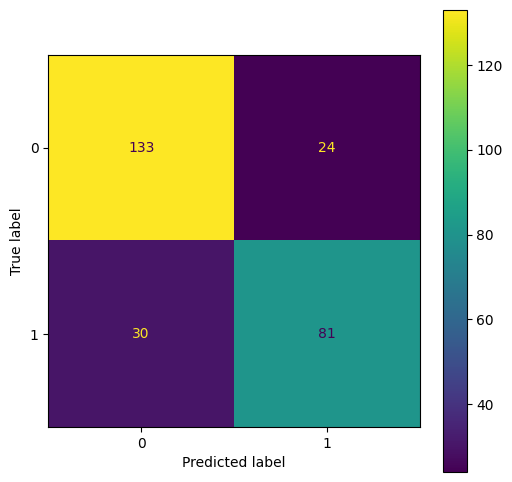

In [134]:
cm = confusion_matrix(y_test, y_pred_lr)
cmp = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
cmp.plot(ax=ax)

In [135]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

